The Lorenz system is the most famous example of a chaotic system. The equations describing the Lorenz system are $$\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma(y - x), \quad \frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho - z) - y, \quad \frac{\mathrm{d}z}{\mathrm{d}t} = xy - \beta z.$$ The system is known to orbit two attractors with parameters $\rho = 28$, $\sigma = 10$, and $\beta = 8/3$, and initial conditions $(x_0, y_0, z_0) = (1, 0, 0)$. We could implement the function describing this system of ODEs as

In [1]:
import numpy as np

def hardcoded_lorenz(t, yvec):
    rho = 28.0
    sigma = 10.0
    beta = 8.0/3.0
    x, y, z = yvec[0], yvec[1], yvec[2]
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])

However, this approach is not very flexible, since it hardcodes the values of $\rho$, $\sigma$, and $\beta$. Thankfully, the Lorenz system can be implemented with $\rho$, $\sigma$, and $\beta$ as additional variables, so long as their values are passed as extra arguments to the `solve` method. Thus, the function we will use is

In [2]:
def lorenz(t, yvec, rho, sigma, beta):
    x, y, z = yvec[0], yvec[1], yvec[2]
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])

Importing the Dormand-Prince method from `solvers.py`, we can solve this system for $0 \leq t \leq 100$ as follows:

In [3]:
import sys
sys.path.append("../src")
from solvers import dormand_prince

rho = 28.0
sigma = 10.0
beta = 8.0/3.0
x0 = 1.0
y0 = 1.0
z0 = 1.0
yvec0 = np.array([x0, y0, z0])
t0 = 0.0
tf = 100.0
h = 0.01

t, y = dormand_prince.solve(lorenz, yvec0, t0, tf, h, args=(rho, sigma, beta))

Solving ODE...


100%|██████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 30570.73it/s]

Solution complete! Time elapsed: 0 min 0.332 sec.


Plotting the solution, we get the following results:

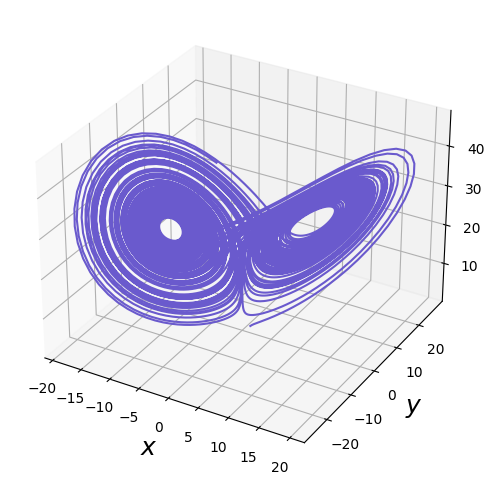

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2], c="slateblue")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_zlabel(r"$z$", fontsize=18)
plt.show()

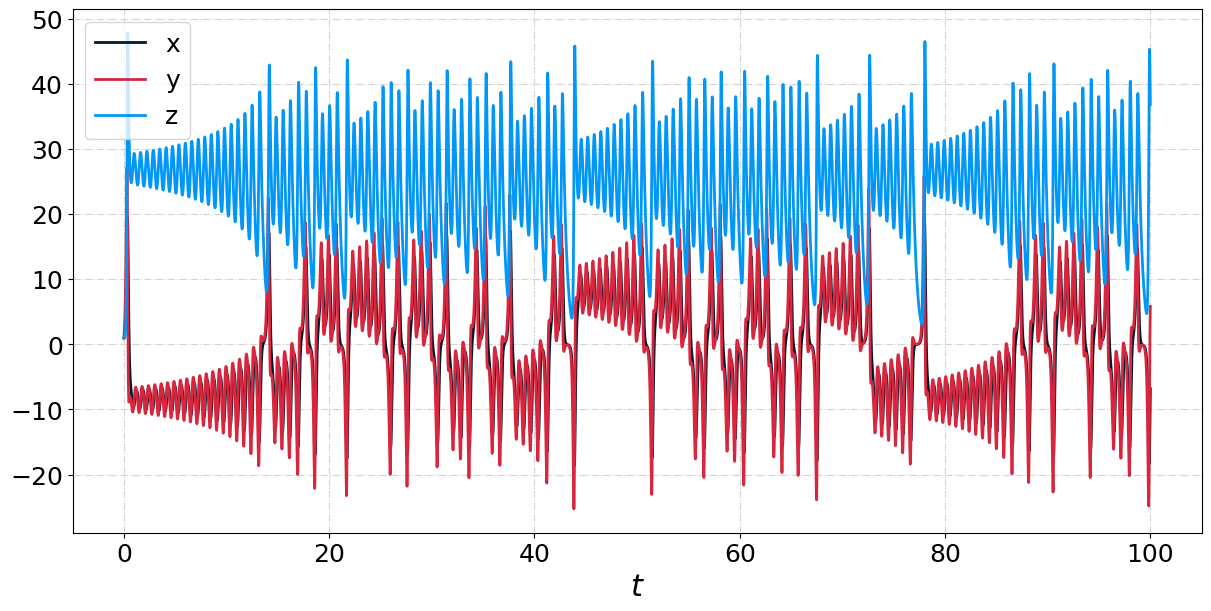

In [5]:
fig, ax = plt.subplots(figsize=(12,6), constrained_layout=True)
ax.grid(True, ls="-.", c="lightgrey")
ax.plot(t, y[:,0], lw=2, c="#02182B", label="x")
ax.plot(t, y[:,1], lw=2, c="#D7263D", label="y")
ax.plot(t, y[:,2], lw=2, c="#0197F6", label="z")
ax.set_xlabel(r"$t$", fontsize=22)
ax.tick_params(axis="both", labelsize=18)
ax.legend(loc="best", fontsize=18)
plt.show()